In [1]:
import sys
import numpy as np
import math

sys.path.append('../../')

from busi.solar import iso52010 as iso
from busi.solar import solar_position as sp
from busi.analyze.interval import Interval
from busi.analyze import graph

Interval

In [2]:
itv = Interval.H1

The series of the standard hour and the day of the year

In [3]:
t_m_ns = itv.get_t_m_ns()
d_ns = itv.get_d_ns()

Calculation(ISO)

In [4]:
alpha_sol_iso, phi_sol_iso, delta_iso_ns, omega_iso_ns = np.vectorize(iso.calc)(
    n_day=d_ns,
    tz=9,
    lambda_w=135.0,
    n_hour=t_m_ns,
    phi_w=43.82,
    half_hour_shift=False
)

Calculation(Heat Load Calc (BRI))

In [5]:
h_sun, a_sun, delta_ns_hlc, omega_ns_hlc = np.vectorize(sp.calc)(
    phi_loc=math.radians(43.82),
    lambda_loc=math.radians(135.0),
    tz=9,
    d=d_ns,
    t_m=t_m_ns
)

Solar Declination

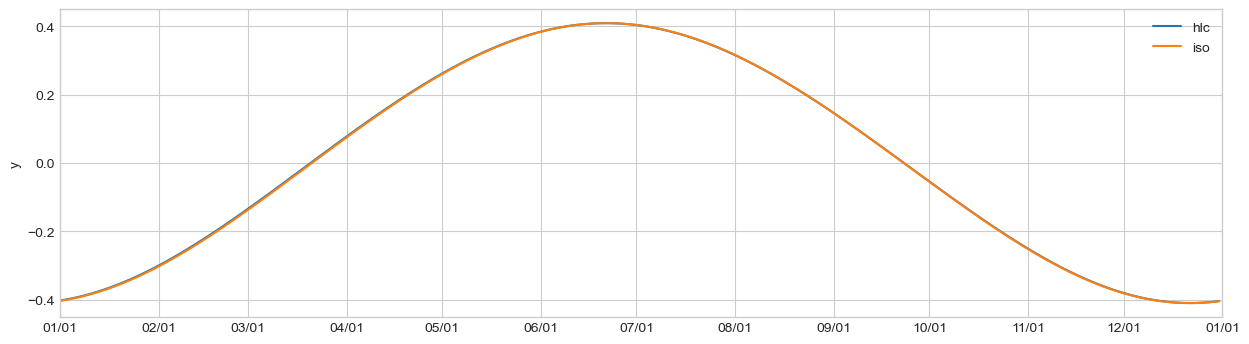

In [6]:
graph.draw_graph(
    'y',
    [
        (delta_ns_hlc, 'hlc'),
        (np.radians(delta_iso_ns), 'iso')
    ]
)

Solar hour angle

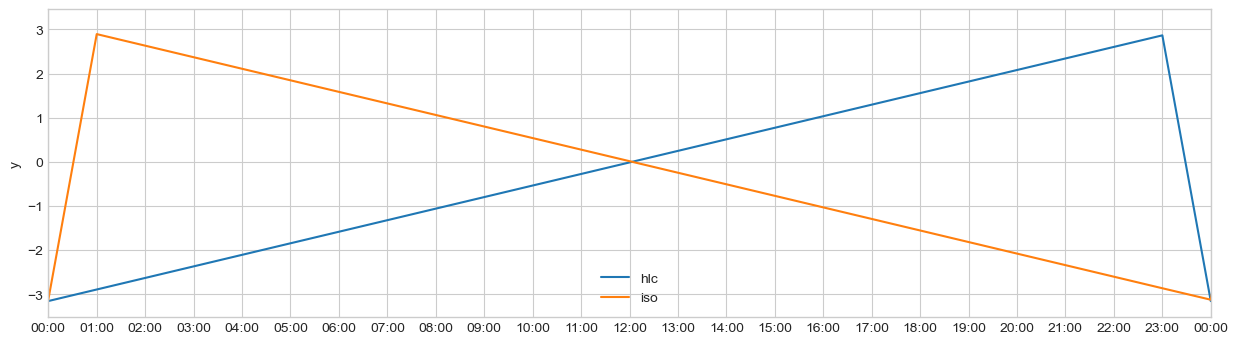

In [7]:
graph.draw_graph(
    'y',
    [
        (omega_ns_hlc, 'hlc'),
        (np.radians(omega_iso_ns), 'iso')
    ],
    op='raw',
    display_date='1/1'
)

Solar altitude angle

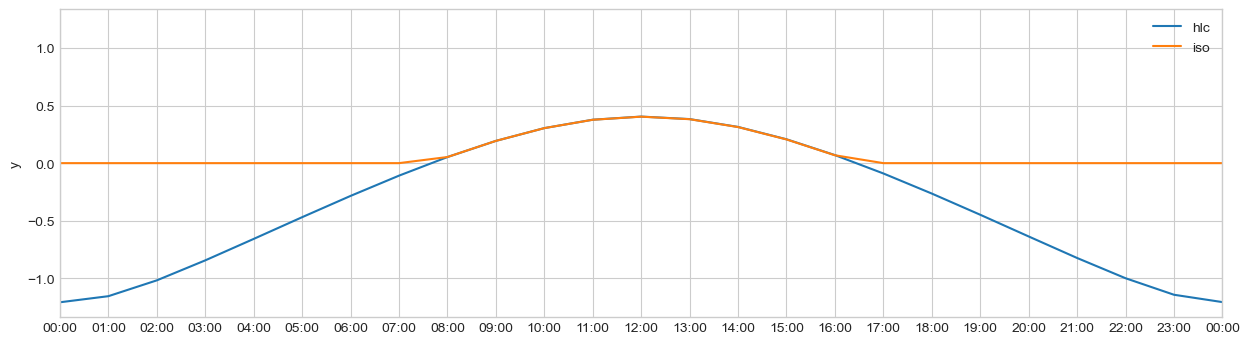

In [8]:
graph.draw_graph(
    'y',
    [
        (h_sun, 'hlc'),
        (np.radians(alpha_sol_iso), 'iso')
    ],
    op='raw',
    display_date='1/1'
)

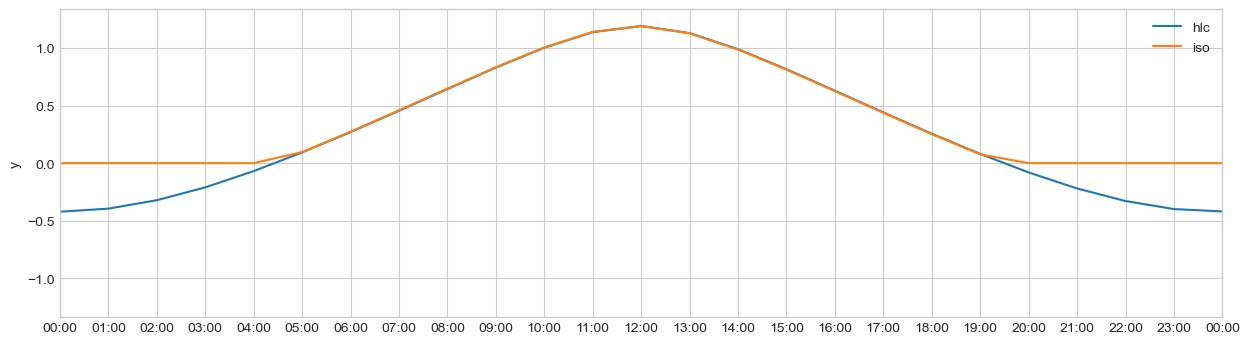

In [9]:
graph.draw_graph(
    'y',
    [
        (h_sun, 'hlc'),
        (np.radians(alpha_sol_iso), 'iso')
    ],
    op='raw',
    display_date='6/1'
)

Solar azimuth angle

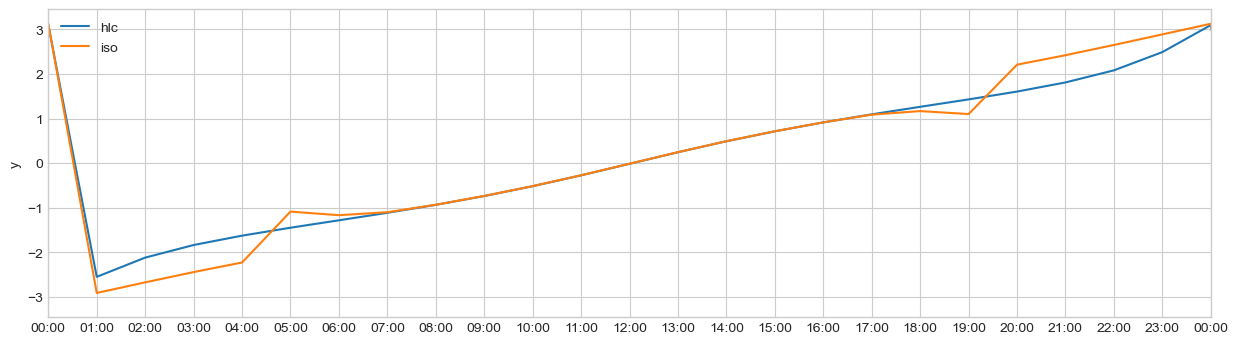

In [10]:
graph.draw_graph(
    'y',
    [
        (a_sun, 'hlc'),
        (-np.radians(phi_sol_iso), 'iso')
    ],
    op='raw',
    display_date='1/1'
)

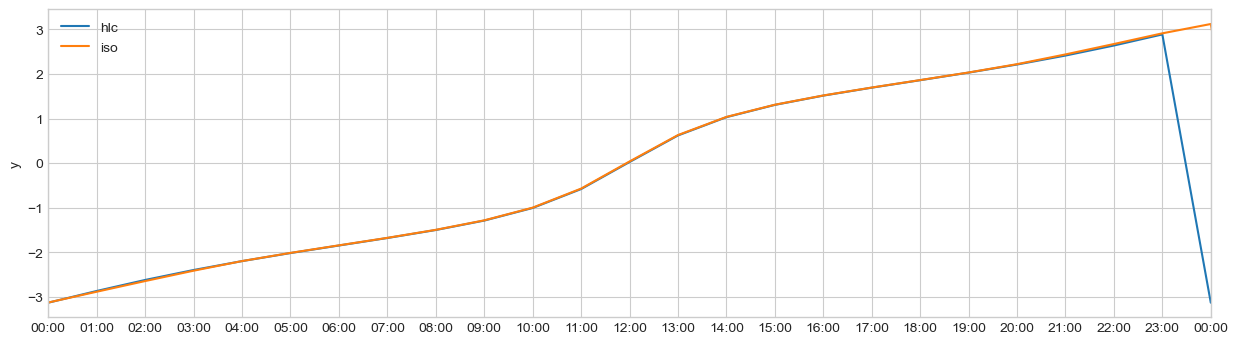

In [11]:
graph.draw_graph(
    'y',
    [
        (a_sun, 'hlc'),
        (-np.radians(phi_sol_iso), 'iso')
    ],
    op='raw',
    display_date='6/1'
)